In [34]:
# Dependencies and Setup
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf

# File to Load
fraud_union = Path("Fraud_Union_db.csv")


# Read Data File and store into Pandas DataFrames
fraud_df = pd.read_csv(fraud_union)

fraud_df.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,trans_num,is_fraud
0,2019-01-01 00:00:00,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,f
1,2019-01-01 00:00:00,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,f
2,2019-01-01 00:00:00,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,f
3,2019-01-01 00:01:00,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,f
4,2019-01-01 00:03:00,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,f


In [2]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604294 entries, 0 to 1604293
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1604294 non-null  object 
 1   merchant               1604294 non-null  object 
 2   category               1604294 non-null  object 
 3   amt                    1604294 non-null  float64
 4   gender                 1604294 non-null  object 
 5   city                   1604294 non-null  object 
 6   state                  1604294 non-null  object 
 7   zip                    1604294 non-null  int64  
 8   lat                    1604294 non-null  float64
 9   long                   1604294 non-null  float64
 10  city_pop               1604294 non-null  int64  
 11  job                    1604294 non-null  object 
 12  dob                    1604294 non-null  object 
 13  trans_num              1604294 non-null  object 
 14  is_fraud          

In [3]:
fraud_df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'is_fraud'],
      dtype='object')

In [4]:
# Specify the desired sample size (e.g., 10% of the original dataset)
sample_size = int(0.03 * len(fraud_df))

# Get a random sample
df_sample = fraud_df.sample(n=sample_size, random_state=42)  # Set random_state for reproducibility

# Display the sampled DataFrame
print(df_sample)

       trans_date_trans_time                            merchant  \
303844   2019-05-27 16:02:00   fraud_Romaguera, Wehner and Tromp   
166211   2019-03-29 10:51:00                 fraud_Auer-Mosciski   
382911   2019-06-24 17:03:00      fraud_Hauck, Dietrich and Funk   
327935   2019-06-05 14:37:00               fraud_Johnston-Casper   
717440   2019-11-02 20:30:00                   fraud_Windler LLC   
...                      ...                                 ...   
118079   2019-03-07 22:45:00  fraud_Daugherty, Pouros and Beahan   
177038   2019-04-02 12:37:00                   fraud_Pollich LLC   
990861   2020-02-08 22:55:00                     fraud_Terry Ltd   
137551   2019-03-16 16:39:00    fraud_Koss, McLaughlin and Mayer   
25495    2019-01-15 15:57:00                   fraud_Kutch-Ferry   

            category     amt gender           city state    zip      lat  \
303844     kids_pets   18.75      F        Shields    ND  58569  46.1838   
166211   grocery_pos  114.05   

In [5]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48128 entries, 303844 to 25495
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  48128 non-null  object 
 1   merchant               48128 non-null  object 
 2   category               48128 non-null  object 
 3   amt                    48128 non-null  float64
 4   gender                 48128 non-null  object 
 5   city                   48128 non-null  object 
 6   state                  48128 non-null  object 
 7   zip                    48128 non-null  int64  
 8   lat                    48128 non-null  float64
 9   long                   48128 non-null  float64
 10  city_pop               48128 non-null  int64  
 11  job                    48128 non-null  object 
 12  dob                    48128 non-null  object 
 13  trans_num              48128 non-null  object 
 14  is_fraud               48128 non-null  object 
dt

In [6]:
df_sample.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'is_fraud'],
      dtype='object')

In [7]:
categorical_columns = ['trans_date_trans_time', 'merchant', 'category', 'gender', 'city', 'state', 'job', 'dob', 'trans_num']

# Use get_dummies to create dummy variables for each categorical column
dummies_df = pd.get_dummies(df_sample, columns=categorical_columns, drop_first=True)


In [9]:
dummies_df

,amt,zip,lat,long,city_pop,is_fraud,trans_date_trans_time_2019-01-01 01:33:00,trans_date_trans_time_2019-01-01 02:27:00,trans_date_trans_time_2019-01-01 02:46:00,trans_date_trans_time_2019-01-01 04:22:00,...,trans_num_fff81a6317bcbff6528465231d50cc3a,trans_num_fff9ae7ac37fad9e0235df9c69af3424,trans_num_fffa3b4911f8868865d7c769d519e7b8,trans_num_fffac5c8ed9870393d7d77c97f738f9c,trans_num_fffac6f8931cdb77c923fcb44339c9f3,trans_num_fffce1dfd7fdae762525901a08ec9cf9,trans_num_fffd193f1729b9f26104d30c0da2d74f,trans_num_fffd77f0b748a44991b99170beb03f9f,trans_num_fffda16b9c0c450696b7fee5d5fb64db,trans_num_ffff6523e55bb8f5aa3935f24ae06baf
303844,18.75,58569,46.1838,-101.2589,77,f,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166211,114.05,23850,37.1349,-77.7364,1051,f,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382911,118.08,29170,33.9568,-81.1405,52126,f,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327935,6.08,70003,29.9975,-90.2146,137067,f,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
717440,21.17,67851,37.9931,-100.9893,2691,f,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118079,8.47,33844,28.0758,-81.5929,33804,f,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177038,37.13,77971,28.7724,-96.4793,911,f,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990861,13.80,56668,48.6031,-93.2977,136,f,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137551,9.89,79759,31.8599,-102.7413,23,f,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Assume 'target' is the column you want to predict
target_column = 'is_fraud'

In [11]:
# Extract features and target variable
X = dummies_df.drop(target_column, axis=1)
y = dummies_df[target_column]

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Create a Decision Tree model
model = DecisionTreeClassifier()

In [14]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [18]:
# Display classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           f       1.00      1.00      1.00      9581
           t       0.76      0.56      0.64        45

    accuracy                           1.00      9626
   macro avg       0.88      0.78      0.82      9626
weighted avg       1.00      1.00      1.00      9626



In [19]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[9573    8]
 [  20   25]]


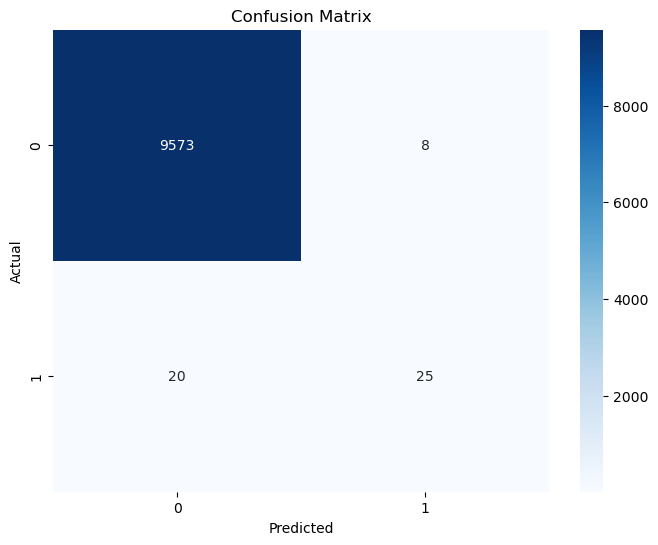

In [20]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_visualization.jpg')
plt.show()

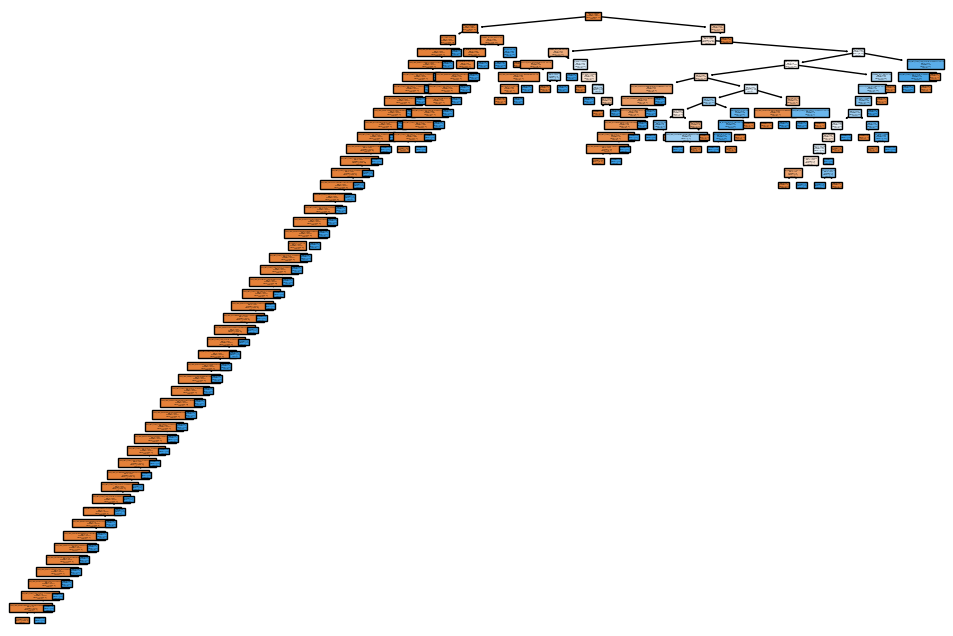

In [21]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.savefig('decision_tree_visualization.jpg')
plt.show()

In [24]:
#Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [25]:
# Set 'is_fraud' as the target variable
target_variable = 'is_fraud'

In [26]:
categorical_columns_rf = ['trans_date_trans_time', 'merchant', 'category', 'gender', 'city', 'state', 'job', 'dob', 'trans_num']

# Use get_dummies to create dummy variables for each categorical column
dummies_rf_df = pd.get_dummies(df_sample, columns=categorical_columns_rf, drop_first=True)

In [27]:
# Extract features and target variable
X = dummies_rf_df.drop(target_variable, axis=1)
y = dummies_rf_df[target_variable]

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [33]:
# Display classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           f       1.00      1.00      1.00      9581
           t       0.00      0.00      0.00        45

    accuracy                           1.00      9626
   macro avg       0.50      0.50      0.50      9626
weighted avg       0.99      1.00      0.99      9626



/Users/victorolguin/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/victorolguin/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/victorolguin/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[9581    0]
 [  45    0]]


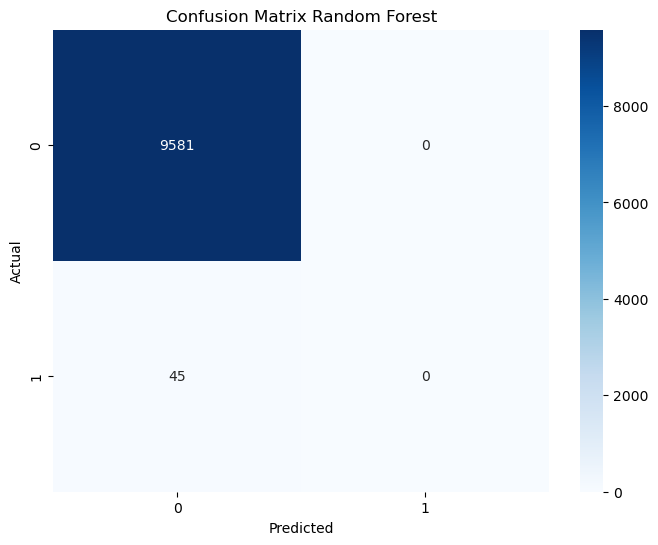

In [35]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_RF_visualization.jpg')
plt.show()

In [36]:
# Get the first decision tree from the Random Forest
first_tree = rf_model.estimators_[0]

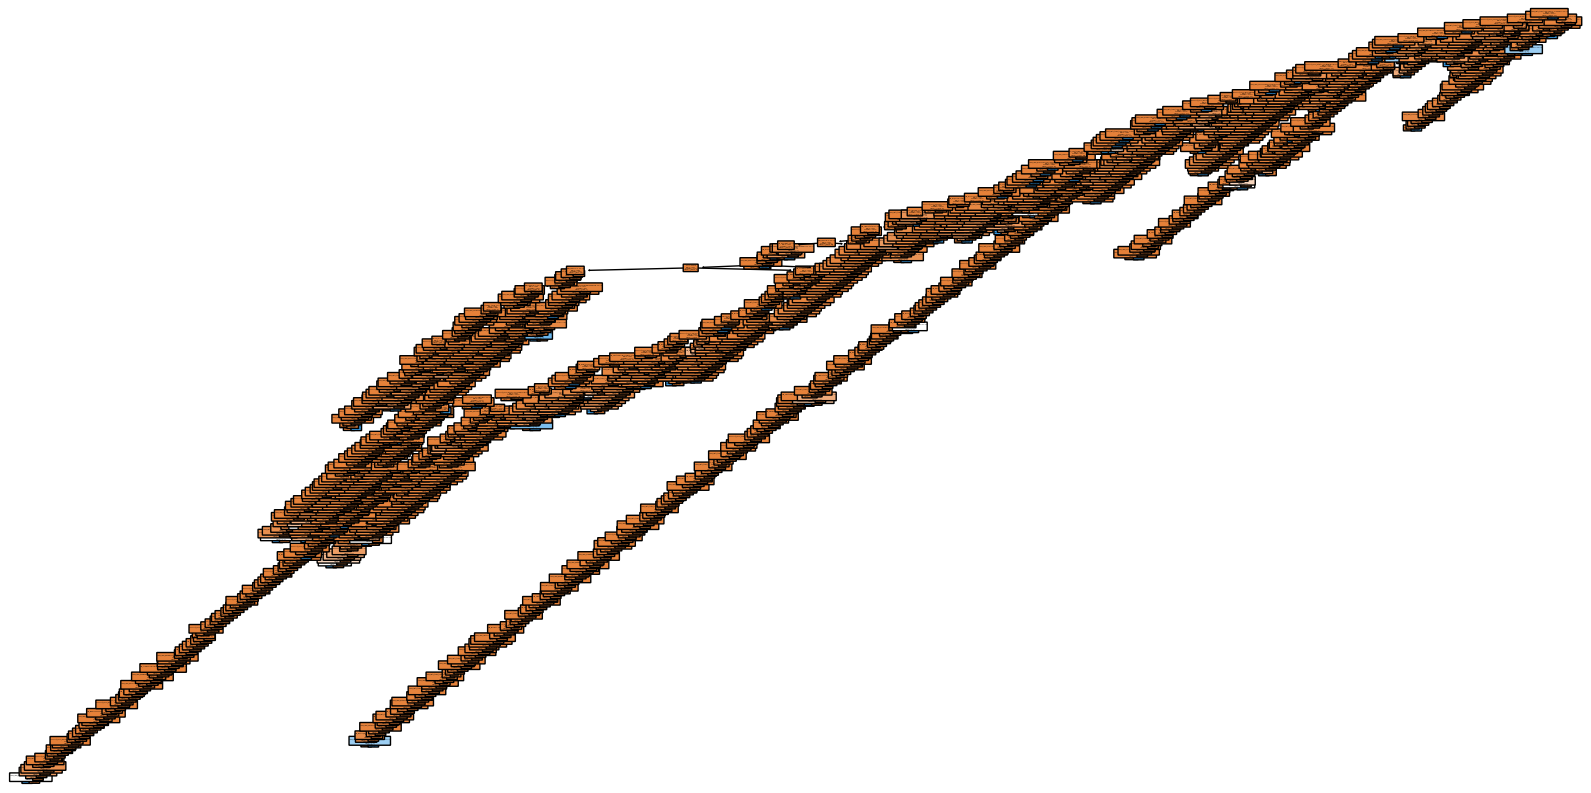

In [37]:
# Visualize the random forest
plt.figure(figsize=(20, 10))
tree.plot_tree(first_tree, feature_names=X.columns, class_names=rf_model.classes_, filled=True, rounded=True)
plt.savefig('ranfom_forest_visualization.jpg')
plt.show()

In [56]:
# Neural Network

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf



In [57]:
# Specify the desired sample size (e.g., 10% of the original dataset)
sample_size_nn = int(0.005 * len(fraud_df))

# Get a random sample
df_sample_nn = fraud_df.sample(n=sample_size, random_state=42)  # Set random_state for reproducibility

# Display the sampled DataFrame
print(df_sample_nn)

       trans_date_trans_time                           merchant  \
303844   2019-05-27 16:02:00  fraud_Romaguera, Wehner and Tromp   
166211   2019-03-29 10:51:00                fraud_Auer-Mosciski   
382911   2019-06-24 17:03:00     fraud_Hauck, Dietrich and Funk   
327935   2019-06-05 14:37:00              fraud_Johnston-Casper   
717440   2019-11-02 20:30:00                  fraud_Windler LLC   
...                      ...                                ...   
247441   2019-05-04 09:11:00  fraud_Kerluke, Kertzmann and Wiza   
198538   2019-04-12 17:11:00    fraud_Reichert, Huels and Hoppe   
831703   2019-12-11 08:06:00      fraud_Christiansen-Gusikowski   
757057   2019-11-19 20:45:00    fraud_Becker, Harris and Harvey   
911870   2019-12-29 11:19:00                 fraud_Smith-Stokes   

             category     amt gender           city state    zip      lat  \
303844      kids_pets   18.75      F        Shields    ND  58569  46.1838   
166211    grocery_pos  114.05      F     

In [59]:
# Determine the number of unique values in each column.
df_sample_nn.nunique()

trans_date_trans_time    7977
merchant                  693
category                   14
amt                      5672
gender                      2
city                      833
state                      50
zip                       891
lat                       889
long                      890
city_pop                  818
job                       473
dob                       888
trans_num                8021
is_fraud                    2
dtype: int64

In [70]:
# Look at category value counts for binning
type_counts = df_sample_nn['category'].value_counts()
type_counts

Other            1905
gas_transport     802
home              781
grocery_pos       778
shopping_pos      699
kids_pets         697
shopping_net      611
entertainment     610
personal_care     572
food_dining       566
Name: category, dtype: int64

In [71]:
# Choose a cutoff value and create a list of application types to be replaced

categories_to_replace = list(type_counts.iloc[11:].index)
cutoff_value = 365

# Replace in dataframe
for cat in categories_to_replace:
    df_sample_nn['category'] = df_sample_nn['category'].replace(cat,"Other")

# Check to make sure binning was successful
df_sample_nn['category'].value_counts()

Other            1905
gas_transport     802
home              781
grocery_pos       778
shopping_pos      699
kids_pets         697
shopping_net      611
entertainment     610
personal_care     572
food_dining       566
Name: category, dtype: int64

In [77]:
# Convert categorical data to numeric with `pd.get_dummies`
columns_to_exclude = ['is_fraud']
dummies_nn = pd.get_dummies(df_sample_nn)
dummies_nn.head()

,amt,zip,lat,long,city_pop,trans_date_trans_time_2019-01-01 00:22:00,trans_date_trans_time_2019-01-01 02:46:00,trans_date_trans_time_2019-01-01 09:41:00,trans_date_trans_time_2019-01-01 13:51:00,trans_date_trans_time_2019-01-01 16:09:00,...,trans_num_ff9fac61e987d599457fb63d19bd8cc6,trans_num_ffafe1bb5bd8a30a9963525b7298c2de,trans_num_ffb1b14a35261e6e0834ade5cd34b9ab,trans_num_ffb6ea357eea2ee77b1d7eb30a6efc2b,trans_num_ffb7220c2d3e8966a11c618f2c4ef941,trans_num_ffbf2dc67beeb20fc90818b701f53297,trans_num_ffee3ebfa00933315f3f4675f7373a60,trans_num_fffd193f1729b9f26104d30c0da2d74f,is_fraud_f,is_fraud_t
303844,18.75,58569,46.1838,-101.2589,77,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
166211,114.05,23850,37.1349,-77.7364,1051,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
382911,118.08,29170,33.9568,-81.1405,52126,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
327935,6.08,70003,29.9975,-90.2146,137067,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
717440,21.17,67851,37.9931,-100.9893,2691,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
# Split our preprocessed data into our features and target arrays
y = dummies_nn['is_fraud_f'].values
X = dummies_nn.drop(columns='is_fraud_f').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [80]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [81]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train[0])
hidden_nodes_layer_1 = 80
hidden_nodes_layer_2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_1, input_dim = input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_2, activation = "relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 80)                1516320   
                                                                 
 dense_19 (Dense)            (None, 30)                2430      
                                                                 
 dense_20 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1518781 (5.79 MB)
Trainable params: 1518781 (5.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [85]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
188/188 [==============================] - 0s 2ms/step - loss: 3.6786e-05 - accuracy: 1.0000
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 2.8309e-05 - accuracy: 1.0000
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 2.2446e-05 - accuracy: 1.0000
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 1.8232e-05 - accuracy: 1.0000
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 1.5001e-05 - accuracy: 1.0000
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 1.2485e-05 - accuracy: 1.0000
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 1.0485e-05 - accuracy: 1.0000
Epoch 8/100
188/188 [==============================] - 0s 2ms/step - loss: 8.9064e-06 - accuracy: 1.0000
Epoch 9/100
188/188 [==============================] - 0s 2ms/step - loss: 7.6025e-06 - accuracy: 1.0000
Epoch 10/100
188/188 [==============================] -

In [88]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

63/63 - 0s - loss: 0.1516 - accuracy: 0.9940 - 55ms/epoch - 873us/step
Loss: 0.15157388150691986, Accuracy: 0.9940179586410522
